# Loan defualt prediction - Exploratory data analysis
The purpose of this workbook is to explore the data, in order to get a general idea of the different elements of the data and relationships between different predictors.
### Overview of workbook
### Data
Data obtained from the "Loan Default Prediction" dataset. See README for more.

### Explanation of the data set
The dataset contains 10.000 loan applicants.
The dataset contains the following variables:

* **Employed**: Is the applicant employed (1 = yes, 0 = no)

* **Bank Balance**: Current funds in account

* **Annual Salary**: Yearly salaray of applicant

* **Defaulted?**: Wether or not the applicant ended up defaulting on their loan. This is our target variable.

* **income_balance_ratio**: (generated variable) measures the amount in an applicants bank account in relation to their yearly income in percent. 

In [1]:
# Importing different modules and reading in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ldf_data = pd.read_csv('/users/kristiandampedersen/documents/data_science_projects/defaultpred_proj/data/loan_data.csv')

## Quick glance at the data
In this section a quick glance of the data will be perfomed, to get a general idea of how its structured. The main takeaway is that the dataset consists of 5 columns, where three are integers and two are float. Its worth mentioning that two of those integers ('Employed' and 'Defaulted?' are dichotomous (1 or 0) variables.
Looking at the predictors, it was deemed useful to create another predictor namely 'income_balance_ratio' that measures the ratio of income to bank balance in percentage of income "saved". This was included to see if the tendency to "save" larger parts of ones income had a significant effect on the likelihood of defaulting. A deeper explanation of the variable is found in the variable list above. Fr

From the quick glance we gather that the dataset contains a high average salary, and that this might be due to two distinct income "classes", as seen be the visualisation below. Finally we created a test set to avoid further bias towards "overfitting" from my own brain.

#### Basic glance

Here we see a general overview of how the data is structures

In [3]:
ldf_data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
ldf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


From the general structure we gather that the data consists of 5 columns, 3 of which are integers and the others are floats. Furthermore we can gather that the dataset contains no null-values, which makes the data-cleaning process a lot easier.

#### Creating income_balance_ratio
From the above columns we can create a bit more depth by creating a predictor that measures the relationship between annual income and current bank balance. This will in effect indirectly measure how prone to saving a given applicant is, which might be interesting in our analysis and model.

In [5]:
# Creating income_balance_ratio
ldf_ibr_ph = ldf_data['Bank Balance']/ldf_data['Annual Salary']*100
ldf_ibr_ph2 = ldf_ibr_ph.round(decimals=2)
ldf_data['income_balance_ratio'] = ldf_ibr_ph2


#### Key indicators

Here we see a general overview of some key indicators

In [128]:
ldf_data.describe().round(decimals=2)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,income_balance_ratio
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,0.71,10024.50,402203.78,0.03,3.24
std,2886.90,0.46,5804.58,160039.67,0.18,3.38
min,1.00,0.00,0.00,9263.64,0.00,0.00
25%,2500.75,0.00,5780.79,256085.52,0.00,1.32
50%,5000.50,1.00,9883.62,414631.74,0.00,2.43
75%,7500.25,1.00,13995.66,525692.76,0.00,4.19
max,10000.00,1.00,31851.84,882650.76,1.00,164.50


#### Taking a look at income

In [7]:
print('From the above we gather that about {:.2f}% of the applicants are employed.\nThe average bank balance of the applicants is {:.2f}, and the average annual salary is {:.2f}.\nThe data tells us that about {:.2f}% defaulted on their loans.'.format(ldf_data['Employed'].mean()*100, ldf_data['Bank Balance'].mean(), ldf_data['Annual Salary'].mean(), ldf_data['Defaulted?'].mean()*100))

From the above we gather that about 70.56% of the applicants are employed.
The average bank balance of the applicants is 10024.50, and the average annual salary is 402203.78.
The data tells us that about 3.33% defaulted on their loans.


One thing that immediately stands out is the incredibly high average salary. This could be due to a number of factors, but its definetly worth keeping in mind as we look at distributions later. For now we'll just quickly get the maximum and minimum salary.

In [8]:
print('A quick reality check on salaries, the minimum annual salary in the data set is {:.2f} whilst the maximum is {:.2f}, this is equal to a difference of {:.3f}.'.format(ldf_data['Annual Salary'].min(), ldf_data['Annual Salary'].max(), ldf_data['Annual Salary'].max()-ldf_data['Annual Salary'].min()))

A quick reality check on salaries, the minimum annual salary in the data set is 9263.64 whilst the maximum is 882650.76, this is equal to a difference of 873387.120.


All in all this means that there is a huge gap between the highest earner and the lowest earner in the dataset. We'll explore this relationship furher later in the EDA.

#### Taking a look at bank balances

In [9]:
print('The average person has {:.2f} in their bank account, 99% of people have less than {:.2f} in their account, and one guy has {:.2f} in his account'.format(ldf_data['Bank Balance'].mean(), ldf_data['Bank Balance'].quantile(0.99), ldf_data['Bank Balance'].max()))

The average person has 10024.50 in their bank account, 99% of people have less than 24101.67 in their account, and one guy has 31851.84 in his account


#### Taking a look at savings

In [10]:
print('The average person saves {:.2f}% of their income, whilst {:.2f}% of people save nothing, and 99% of people save less that {:.2f}% of their income'.format(ldf_data['income_balance_ratio'].mean(), ((len(ldf_data[ldf_data['income_balance_ratio']==0])/(len(ldf_data))*100)), ldf_data['income_balance_ratio'].quantile(0.99)))

The average person saves 3.24% of their income, whilst 5.03% of people save nothing, and 99% of people save less that 13.46% of their income


Lastly in this quick glance, we'll quickly take a look at the distributions of our three continous predictors.

<AxesSubplot:xlabel='income_balance_ratio', ylabel='Count'>

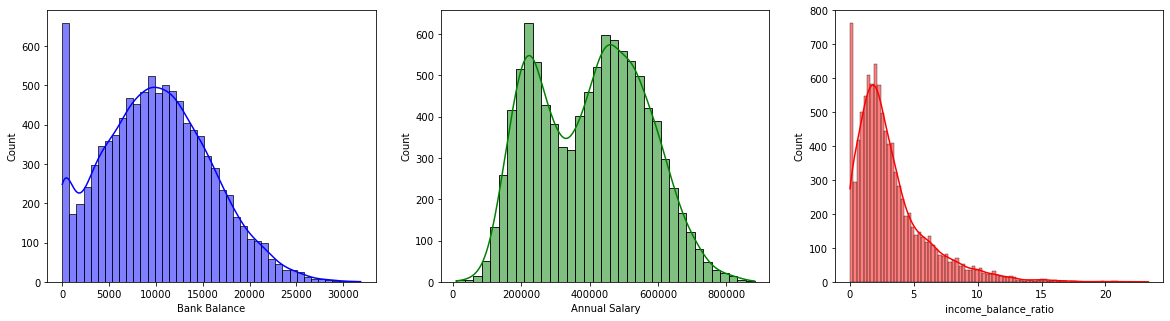

In [11]:
ldf_savings_percentile = ldf_data[ldf_data['income_balance_ratio'] < ldf_data['income_balance_ratio'].quantile(0.999)]
# Creating distributions over the two continous variables
f, ax1 = plt.subplots(1,3, figsize=(20,5))
sns.histplot(ax=ax1[0], x=ldf_data['Bank Balance'], color='blue', kde=True)
sns.histplot(ax=ax1[1],x=ldf_data['Annual Salary'], color='green', kde=True)
sns.histplot(ax=ax1[2],x=ldf_savings_percentile['income_balance_ratio'], color='red', kde=True)

From this visualisation we gather that whilst bank balance is somewhat normally distributed (excluding A LOT of 0's), Annual salary doesnt seem to be. The percentage of income sabed, seems to b somewhat normally distributed, however as with bank balance this is naturally excluding a lot of 0's. Again this will be something to look out for in further analysis.

### Creating a test set
Before we go any further its worth creating a test set. This is due to the fact that the human brain is amazing at quickly spotting patterns, which unfortunately makes it vary prone to overfitting models ;). So in order to avoid this (or atleast be able to somewhat control for it), i create a test set before going any further.

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ldf_data, test_size=0.2, random_state=1)

## Correlations
In this section i'll quite simply be creating a heatmap, to give an overview of which correlations might be interesting to examine

<AxesSubplot:title={'center':'Correlations in the data set'}>

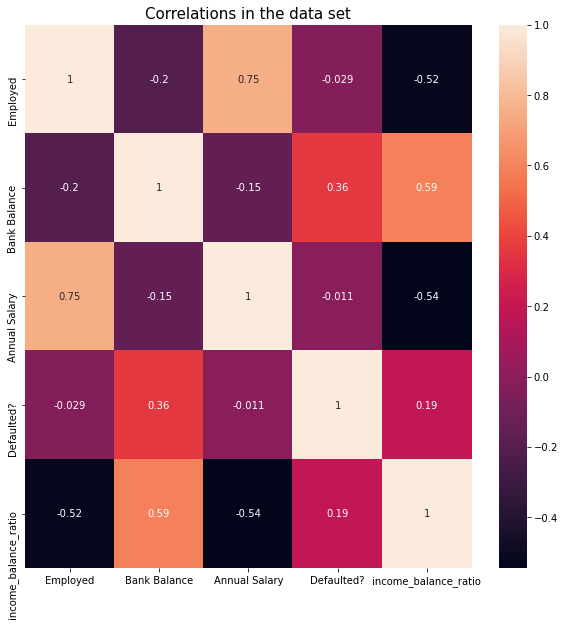

In [13]:
corrdata = train_set.corr()
corrdata = corrdata.drop('Index', axis='columns')
corrdata = corrdata.drop('Index')
# Shaping the plot
plt.figure(figsize=(10,10))
plt.title('Correlations in the data set', fontsize=15)
sns.heatmap(corrdata, annot=True)

What we're truly interested in here, is what correlats with wether or not someone defaults on their loan. Here we see that both income_balance_ratio and bank balance are positively correlated with defaulting on a loan. Conversely both annual salary and employment status are negatively correlated with defaulting. There are a few interesting things here:
1. Having a *higher* bank balance, seems to be associated with *higher* rates of defaulting, which is surprising
2. Being employed seem to matter relatively little when it comes to wether or not someone defaults on their loan.
3. Having a high percentage of income saved also seems to *increase* the likelihood of defaulting

## Correlations between income_balance_ratio and defaulting
The first correlation i'll look into, is the counter-intuitve pattern that a higher percentage of income saved, leads to a higher likelihood of defaulting. Intuitively this doesn't make sense, so lets dive in.

First i'll create a scatterplot showing the relationship between income_balance_ratio and defaulting. I'll be including a *trend line* to help with the visualisation.

<AxesSubplot:title={'center':'Relationship between income_balance_ratio and defaulting'}, xlabel='Defaulted?', ylabel='income_balance_ratio'>

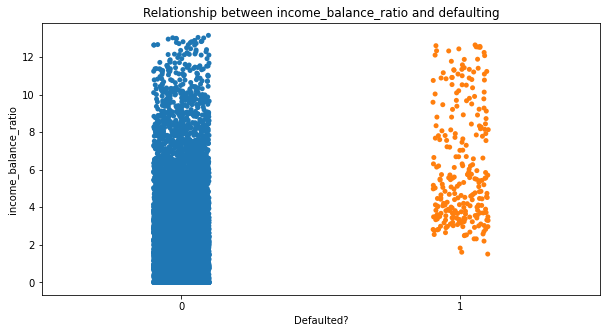

In [14]:
# Data smooshing
ibr99 = train_set[train_set['income_balance_ratio'] < train_set['income_balance_ratio'].quantile(0.99)]
# plotting
plt.figure(figsize=(10,5))
plt.title('Relationship between income_balance_ratio and defaulting')
plt.xlim([0,1])
sns.stripplot(x='Defaulted?', y='income_balance_ratio', data=ibr99)

Now whilst this *does* seem to indicate that having a higher income_balance_ratio leads to more defaulting, its worth double checking that this is actually a statistical significant finding and not just a result of a smaller sub-sample.

In [15]:
from scipy.stats import ttest_ind
ttest_ind(train_set['Defaulted?'], train_set['income_balance_ratio']).pvalue

0.0

So this is a statistically significant findign huh?... This means that our data actually does show this relationship, below i have mapped a distribution that tells this more clearly:

<AxesSubplot:title={'center':'Proportion of savings category, defaulted vs non-defaulted'}, xlabel='income_balance_ratio', ylabel='Density'>

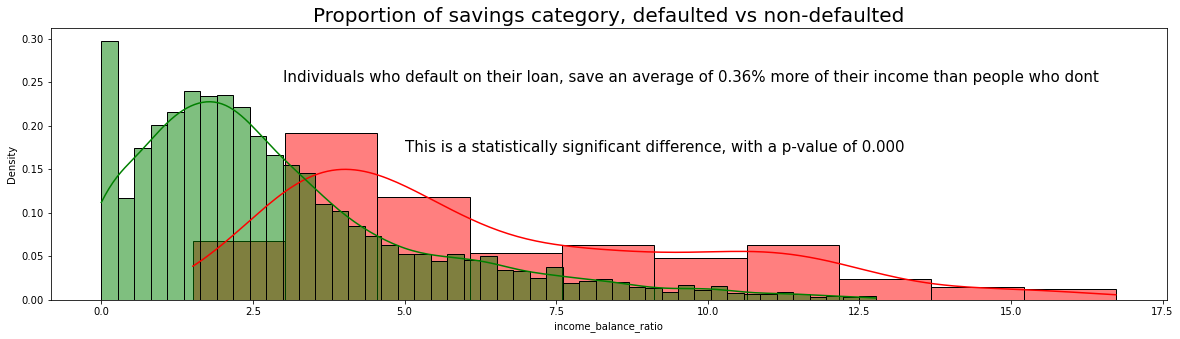

In [17]:
# Data
def_data = train_set[train_set['Defaulted?']==1]
nodef_data = train_set[train_set['Defaulted?']==0]
def_data = def_data[def_data['income_balance_ratio'] < def_data['income_balance_ratio'].quantile(0.99)]
nodef_data = nodef_data[nodef_data['income_balance_ratio'] < nodef_data['income_balance_ratio'].quantile(0.99)]
# Plotting
f, ax1 = plt.subplots(figsize=(20,5))
plt.title('Proportion of savings category, defaulted vs non-defaulted', fontsize=20)
plt.text(3,0.25, 'Individuals who default on their loan, save an average of {:.2f}% more of their income than people who dont'.format(((def_data['income_balance_ratio'].mean()/def_data['income_balance_ratio'].sum())*100)-(nodef_data['income_balance_ratio'].mean()/nodef_data['income_balance_ratio'].sum())*100), fontsize=15)
plt.text(5,0.17, 'This is a statistically significant difference, with a p-value of {:.3f}'.format(ttest_ind(def_data['income_balance_ratio'], nodef_data['income_balance_ratio']).pvalue), fontsize=15)
sns.histplot(def_data['income_balance_ratio'], stat='density', color='red', kde=True, alpha=0.5)
sns.histplot(nodef_data['income_balance_ratio'], stat='density', color='green', kde=True, alpha=0.5)

## Correlations between bank balance and defaulting
Another surprising relationship from above, is that a higher bank balance seems to be correlated with a higher likelihood of defaulting. In this section i'll visualize this relationship and try to determine the nature of it.

#### Strip plot
From the strip plot below i gather that almost no one who defaulted had a low bank balance. This indicates a flaw in the data-set where the labeling of "Bank Balance" might actually refer to "deficit/loan/liabilities" and the like. This does also explain the relationship with income_balance_ratio we see above. This is a fault that needs correcting, however as it is a labeling error and both our training and testing dataset are in agreement with it, it should'nt affect *this* model too much. However the label should be corrected.

<AxesSubplot:title={'center':'Strip plot over relationship between bank balance and defaulting'}, xlabel='Defaulted?', ylabel='Bank Balance'>

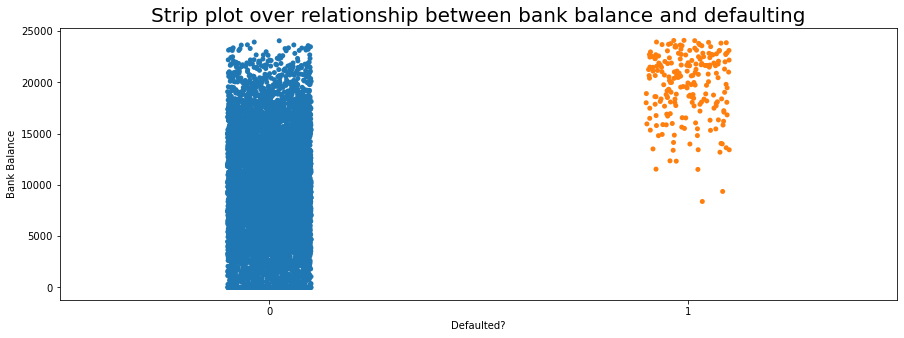

In [18]:
# Data (getting the 99th percentile to eliminate outliers)
bb_data = train_set[train_set['Bank Balance'] < train_set['Bank Balance'].quantile(0.99)]
# Plotting
plt.figure(figsize=(15,5))
plt.title('Strip plot over relationship between bank balance and defaulting', fontsize=20)
sns.stripplot(x='Defaulted?', y='Bank Balance', data=bb_data)

#### Distributions

<AxesSubplot:title={'center':'Distributions over bank balance, defaulted vs non-defaulted'}, xlabel='Bank Balance', ylabel='Density'>

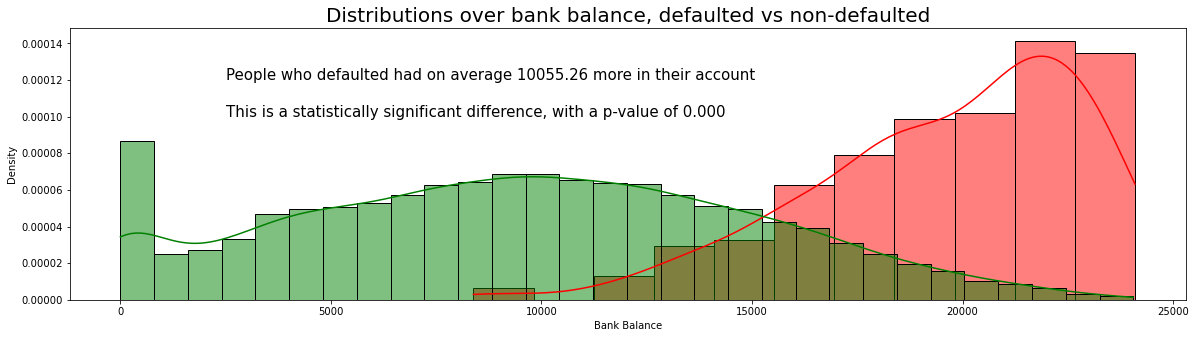

In [19]:
# Data
def_balance = bb_data[bb_data['Defaulted?']==1]
nodef_balance = bb_data[bb_data['Defaulted?']==0]

# Plotting
f, ax1 = plt.subplots(figsize=(20,5))
plt.title('Distributions over bank balance, defaulted vs non-defaulted', fontsize=20)
plt.text(2500,0.00012, 'People who defaulted had on average {:.2f} more in their account'.format(def_balance['Bank Balance'].mean() - nodef_balance['Bank Balance'].mean()), fontsize=15)
plt.text(2500,0.00010, 'This is a statistically significant difference, with a p-value of {:.3f}'.format(ttest_ind(def_balance['Bank Balance'], nodef_balance['Bank Balance']).pvalue), fontsize=15)
sns.histplot(def_balance['Bank Balance'], kde=True, stat='density', color='red', alpha=0.5)
sns.histplot(nodef_balance['Bank Balance'], kde=True, stat='density', color='green', alpha=0.5)

From these visualisations we see that individuals who default on their loans tend to have a *significantly* higher bank balance. This finding makes sense, as we learned earlier that bank balance is relatetively strongly correlated with defaulting

## Relationships with annual earnings
Another area that intuitively makes sense to investigate is how annual earnings affects the likelihood of defaulting.

### Annual earnings between defaulted and non-defaulted (distributions)

<AxesSubplot:title={'center':'Annual salary, defaulted vs non-defaulted'}, xlabel='Annual Salary', ylabel='Density'>

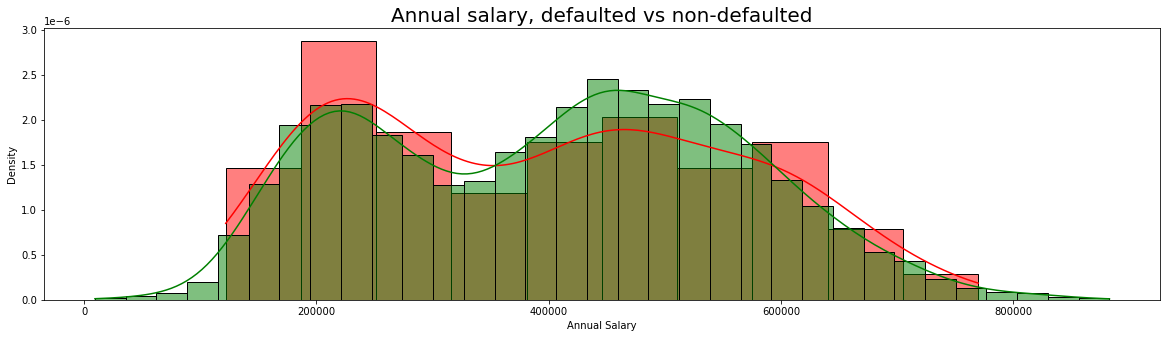

In [126]:
# Data
ae_data = train_set.copy()
ae_def = ae_data[ae_data['Defaulted?']==1]
ae_nodef = ae_data[ae_data['Defaulted?']==0]

# Styling 
f, ax2 = plt.subplots(figsize=(20,5))
plt.title('Annual salary, defaulted vs non-defaulted', fontsize=20)
#plt.text(, 'People who defaulted earned on average {} more/less'.format(ae_nodef['Annual Salary'].mean() - ae_def['Annual Salary'].mean()))
# Plotting
sns.histplot(ae_def['Annual Salary'], kde=True, stat='density', color='red', alpha=0.5)
sns.histplot(ae_nodef['Annual Salary'], kde=True, stat='density', color='green', alpha=0.5)

In [123]:
print('pvalue: {:.2f}'.format(ttest_ind(ae_def['Annual Salary'], ae_nodef['Annual Salary']).pvalue))

pvalue: 0.31


From the above graph we gather that there doesnt seem to be a significant relationship between annua salaries and the likelihood of defaulting. Going forward this means that including this variable might lessen the accuracy of our model if we include the variabel.

### Annual earnings and income_balance_ratio (scatter plot)
Another thing worth investigating is how annual earnings affect an individuals income_balance_ratio. Here we gather that higher income tends to lead to lower percentages of incomes saved. It looks like it tapers of in a logarithmic fashion, which we'll have to pay attention to later on.

<AxesSubplot:title={'center':'Scatterplot over Annual Salary and income_balance_ratio'}, xlabel='Annual Salary', ylabel='income_balance_ratio'>

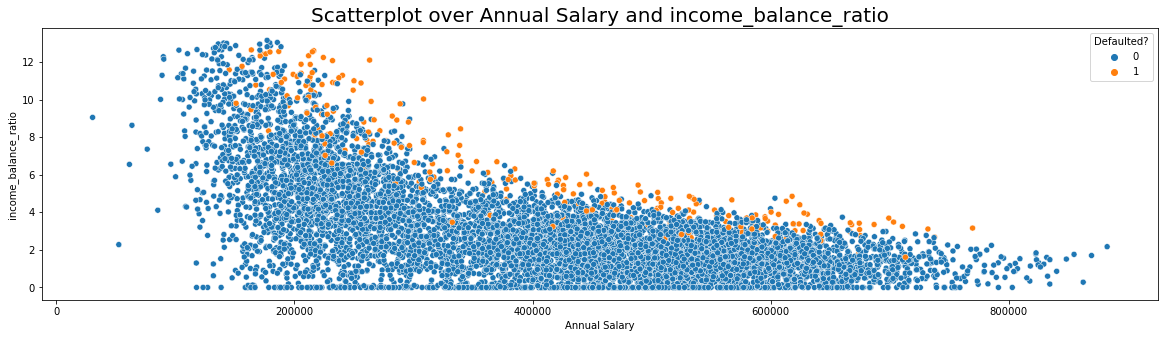

In [31]:
#Data
ibr_data = train_set[train_set['income_balance_ratio'] < train_set['income_balance_ratio'].quantile(0.99)]
#Plotting
plt.figure(figsize=(20,5))
plt.title('Scatterplot over Annual Salary and income_balance_ratio', fontsize=20)
sns.scatterplot(x=ae_data['Annual Salary'], y=ibr_data['income_balance_ratio'], hue=ae_data['Defaulted?'])

### Annual earnings and bank-balance (with + without hue)
In line with the above exploration, it can also be worth quickly looking at the relationship between annual earnings and bank-balance. from the scatterplot above we would expect there to be a similar relationship with bank balance. However his is not what we find. There seems to be basically *no* relationship between annual earnings and bank balance, which again might mean that annual earnings as a variable is either not needed or relatively unimportant. We will test this in our modelbuilding phase.

<AxesSubplot:title={'center':'Scatter plot over Annual Salary and Bank Balance'}, xlabel='Annual Salary', ylabel='Bank Balance'>

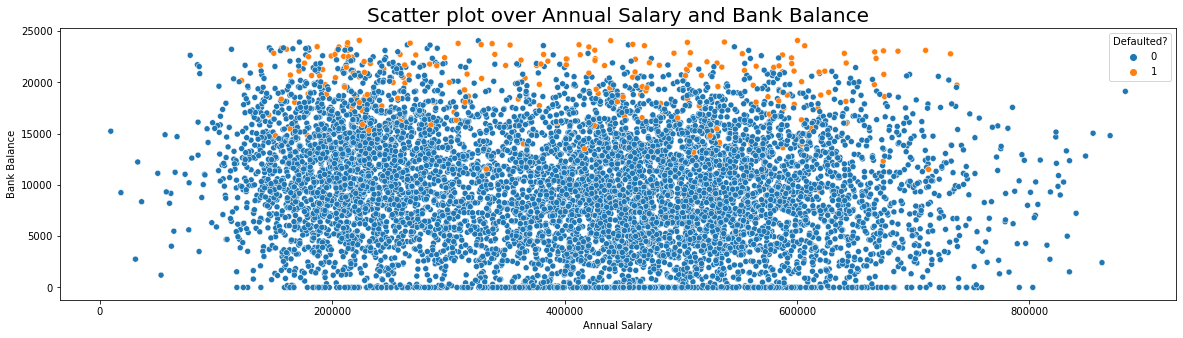

In [52]:
plt.figure(figsize=(20,5))
plt.title('Scatter plot over Annual Salary and Bank Balance', fontsize=20)
sns.scatterplot(x=ae_data['Annual Salary'], y=bb_data['Bank Balance'], hue=train_set['Defaulted?'])

### Annual earnings and employment
Now lastly lets do the obvious one. Do people who are unemployed earn less than employed individuals? As we see below this is definetly the case, with unemployed individuals earnings significantly less that employed individuals.

<AxesSubplot:xlabel='Annual Salary', ylabel='Density'>

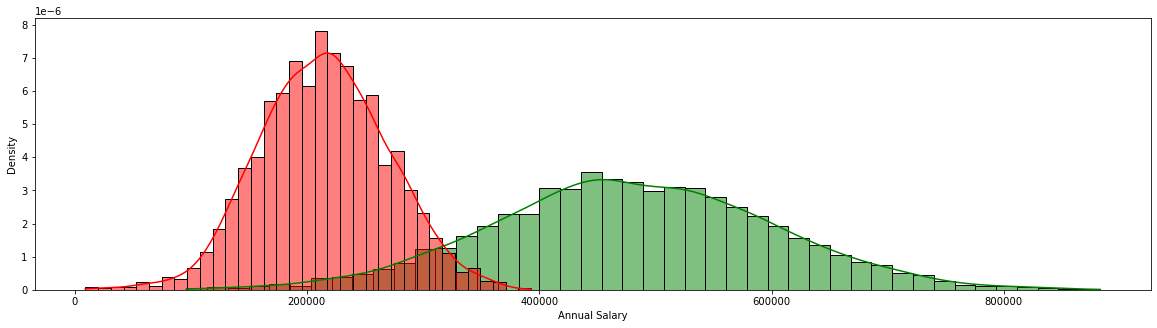

In [55]:
# Data
ey_data = ae_data[ae_data['Employed']==1]
en_data = ae_data[ae_data['Employed']==0]

# Plotting
f, ax1 = plt.subplots(figsize=(20,5))
sns.histplot(ey_data['Annual Salary'], stat='density', color='green', kde=True, alpha=0.5)
sns.histplot(en_data['Annual Salary'], stat='density', color='red', kde=True, alpha=0.5)

## Relationships with employment

### Employment between defaulted and non-defaulted
As a final note we'll quickly look at what percentage of employed vs unemployed people end up defaulting. We also look at what percentage of defaulters are unemployed. From our enquiries we gather that there does seem to be an overrepresentation of unemployed people who default compared to employed individuals. This just means that we'll be including the predictor in our modelbuilding

In [113]:
# Data
edy_data = train_set[train_set['Employed']==1]
edn_data = train_set[train_set['Employed']==0]
bardata_emp = edy_data['Defaulted?'].value_counts()
bardata_noemp = edn_data['Defaulted?'].value_counts()
ph_def = ['0', '1']
bardata = {'Employed': bardata_emp, 'Unemployed': bardata_noemp, 'Defaulted': ph_def}
df_bar = pd.DataFrame(data=bardata)
bardata_emp
# Mathing
perc_emp = (bardata_emp.iloc[1]/bardata_emp.iloc[0])*100
perc_noemp = (bardata_noemp.iloc[1]/bardata_noemp.iloc[0])*100
perc_def = (df_bar['Unemployed'].iloc[1]/(df_bar['Unemployed'].iloc[1] + df_bar['Employed'].iloc[1]))*100
unemp_perc_pop = ((df_bar['Unemployed'].iloc[0] + df_bar['Unemployed'].iloc[1])/(df_bar['Employed'].iloc[0] + df_bar['Employed'].iloc[0] + df_bar['Unemployed'].iloc[0] + df_bar['Unemployed'].iloc[1]))*100
df_bar.head()

,Employed,Unemployed,Defaulted
0,5502,2224,0
1,175,99,1


In [115]:
#Enquiry into what % of unemployed and employed people end up defaulting
print('{:.2f}% of unemployed people defaulted compared to {:.2f}% of employed people'.format(perc_noemp, perc_emp))

4.45% of unemployed people defaulted compared to 3.18% of employed people


In [109]:
#Enquiry into what % of defaulters are unemployed
print('{:.2f}% of the individuals who default on their loans are unemployed, despite making up only {:.2f}% of the entire dataset'.format(perc_def, unemp_perc_pop))

36.13% of the individuals who default on their loans are unemployed, despite making up only 17.43% of the entire dataset
